# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
import networkx as nx
import nxviz
import community
import pandas as pd
import itertools
import matplotlib.pyplot as plt


## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [2]:
basketball = pd.read_csv('./data/us_mens_basketball.csv')

In [3]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [4]:
len(basketball['Name'].unique())

196

## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [5]:

# We'll first make a list of lists of players who played in the same game, divided per each game:

players_per_game = [basketball[basketball['Games'] == game]['Name'].to_list() for game in basketball['Games'].unique()]

# for each game, we'll find all the possible combinations of players in pairs

edges = [list(itertools.combinations(players, 2)) for players in players_per_game]

# We're making a Dataframe for each game, and joining them into one unique

relations = pd.concat([pd.DataFrame(game, columns =['Name_x', 'Name_y']) for game in edges], axis=0)

In [6]:
relations.head()

,Name_x,Name_y
0,Julius Shareef Abdur-Rahim,Walter Ray Allen
1,Julius Shareef Abdur-Rahim,"Vincent Lamont ""Vin"" Baker"
2,Julius Shareef Abdur-Rahim,"Vincent Lamar ""Vince"" Carter"
3,Julius Shareef Abdur-Rahim,Kevin Maurice Garnett
4,Julius Shareef Abdur-Rahim,"Timothy Duane ""Tim"" Hardaway"


In [7]:
# counting the games where the players coincide

relations.groupby(['Name_x','Name_y']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

,Name_x,Name_y,count
152,Carmelo Kyan Anthony,LeBron Raymone James,3
752,Michael Jeffrey Jordan,"Christopher Paul ""Chris"" Mullin",2
136,Carmelo Kyan Anthony,Deron Michael Williams,2
962,Scottie Maurice Pippen,David Maurice Robinson,2
115,"Carlos Austin Boozer, Jr.","Dwyane Tyrone Wade, Jr.",2
...,...,...,...
419,Harrison Bryce Jordan Barnes,Paul George,1
418,Harrison Bryce Jordan Barnes,Kyrie Andrew Irving,1
417,Harrison Bryce Jordan Barnes,Kyle Lowry,1
416,Harrison Bryce Jordan Barnes,Klay Alexander Thompson,1


## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [8]:
G = nx.from_pandas_edgelist(relations, 'Name_x', 'Name_y')

In [9]:
len(G.nodes())

196

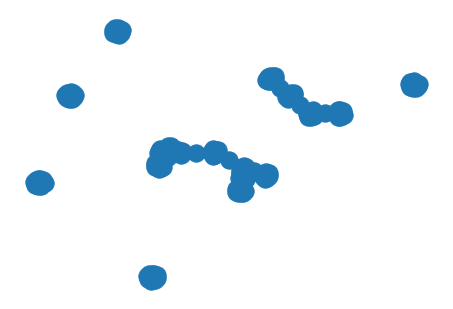

In [10]:
nx.draw(G)

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [11]:
print(f' Number of nodes: {G.number_of_nodes()}\n',
f'Number of edges: {G.number_of_edges()}\n',
f'Average degree: {round(G.number_of_edges() * 2 / G.number_of_nodes(), 2)}\n',
f'Density: {round(nx.density(G),2)}',
)

 Number of nodes: 196
 Number of edges: 1232
 Average degree: 12.57
 Density: 0.06


#### Defining functions for drawing:

In [12]:
pos = nx.spring_layout(G)

In [13]:
def draw(G, pos, measures, measure_name, logscale=False, labels=False):
    
    fig = plt.figure(figsize=(11, 11))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.Purples, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_edgecolor('k')
    
    if logscale:
        nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    if labels:
        labels = nx.draw_networkx_labels(G, pos)
        
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [14]:
b_centrality = nx.betweenness_centrality(G)

In [15]:
high_b_centrality = sorted(b_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

high_b_centrality

[('Gary Dwayne Payton', 0.09193761564895586),
 ('Jason Frederick Kidd', 0.09135606661379858),
 ('Carmelo Kyan Anthony', 0.04742268041237115),
 ('David Maurice Robinson', 0.03266190853819725),
 ('William Marion "Bill" Hougland', 0.030240549828178694)]

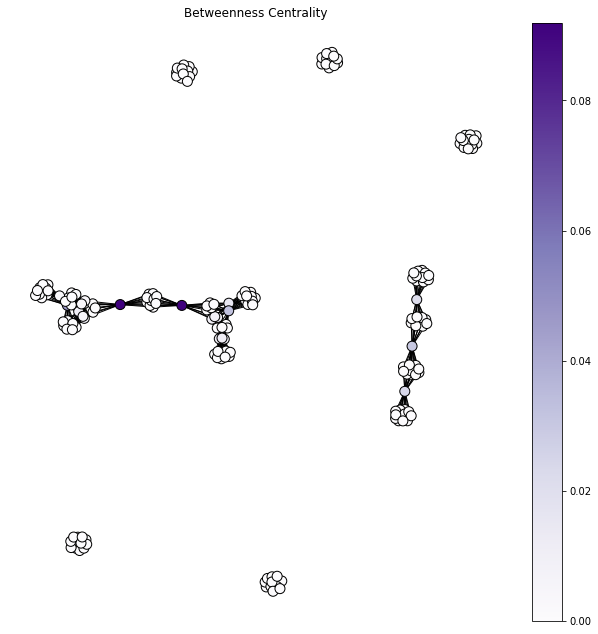

In [16]:
draw(G, pos, b_centrality, 'Betweenness Centrality')

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [17]:
eigen_centrality = nx.eigenvector_centrality_numpy(G)

Had to use the numpy variant of nx.eigenvector_centrality() because the 'normal' one had an error. It seems that due to the characteristics of our graphs, eigenvector has some negative values that cannot be handled by the function.

In [18]:
high_eigen_centrality = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

high_eigen_centrality

[('Carmelo Kyan Anthony', 0.3418500566719081),
 ('LeBron Raymone James', 0.2884535214315895),
 ('Kobe Bean Bryant', 0.22431681558531313),
 ('Deron Michael Williams', 0.22431681558531313),
 ('Christopher Emmanuel "Chris" Paul', 0.22431681558531302)]

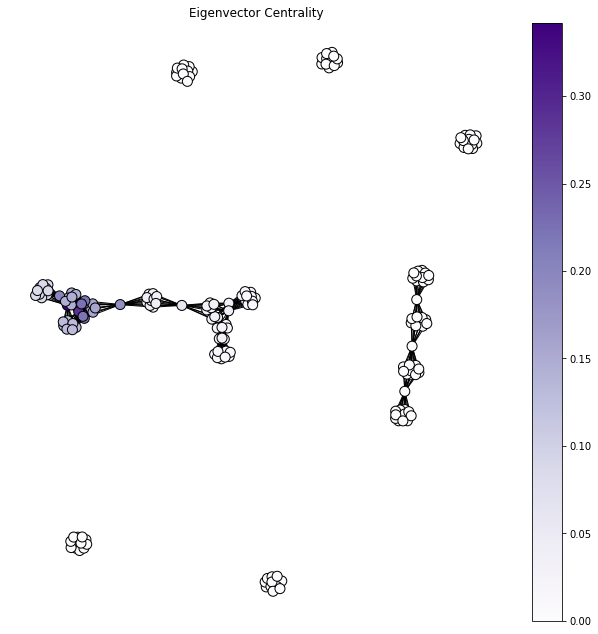

In [19]:
draw(G, pos, eigen_centrality, 'Eigenvector Centrality')

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [20]:
degree_centrality = nx.degree_centrality(G)

In [21]:
high_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

high_degree_centrality

[('Carmelo Kyan Anthony', 0.18461538461538463),
 ('David Maurice Robinson', 0.14358974358974358),
 ('LeBron Raymone James', 0.13333333333333333),
 ('Robert Albert "Bob" Kurland', 0.13333333333333333),
 ('William Marion "Bill" Hougland', 0.12307692307692308)]

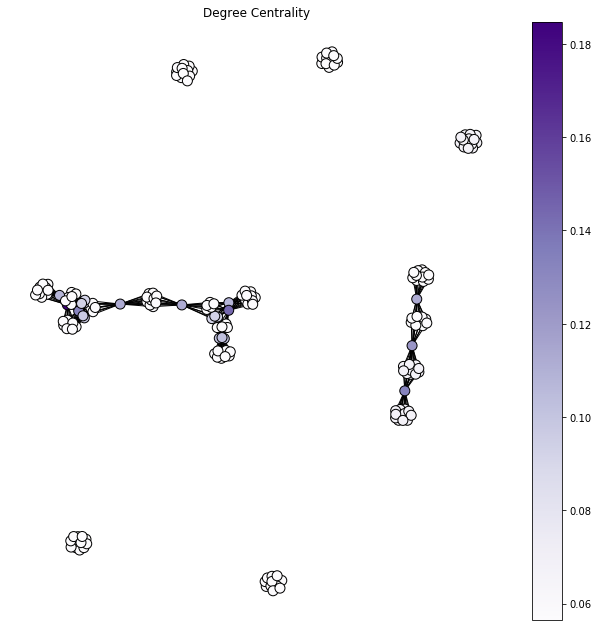

In [22]:
draw(G, pos, degree_centrality, 'Degree Centrality')

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

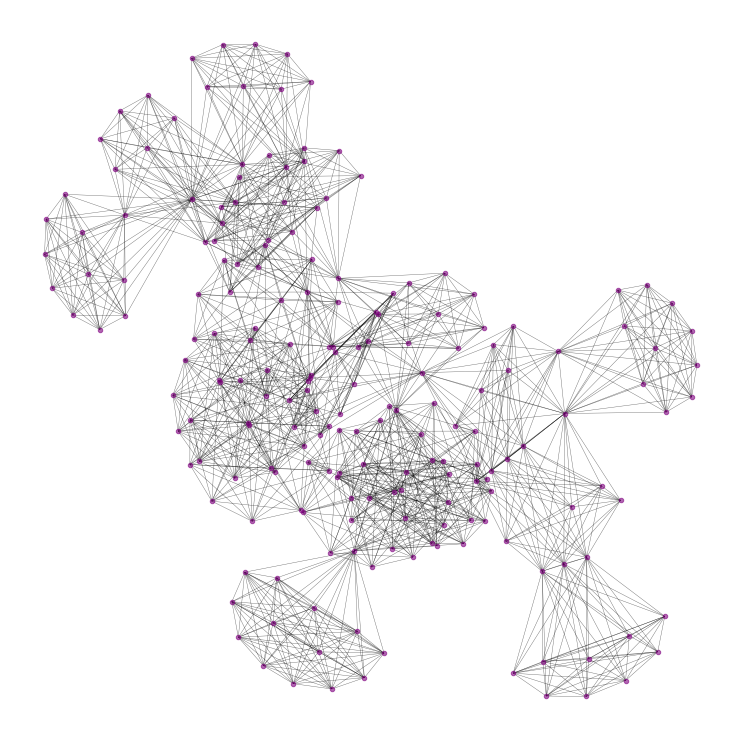

In [23]:
fig = plt.figure(figsize=(10, 10))

nx.draw_kamada_kawai(G, node_size=20, node_color='purple', alpha=0.6, width=0.4)

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

In [24]:
ego_graph = nx.ego_graph(G, high_b_centrality[0][0])

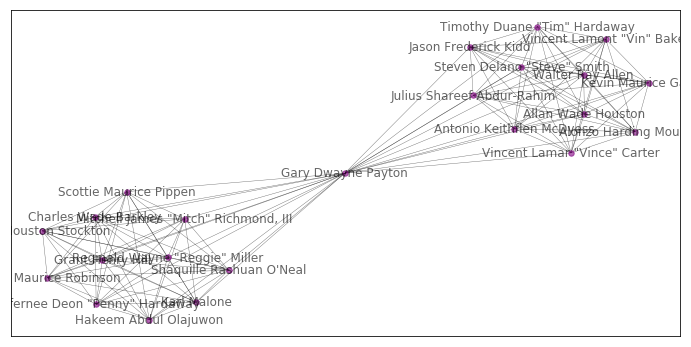

In [25]:
plt.figure(figsize=(12, 6))

nx.draw_networkx(ego_graph, node_size=30, node_color='purple', with_labels=True,
                     alpha=0.6, width=0.4)

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [26]:
partition = community.best_partition(G)

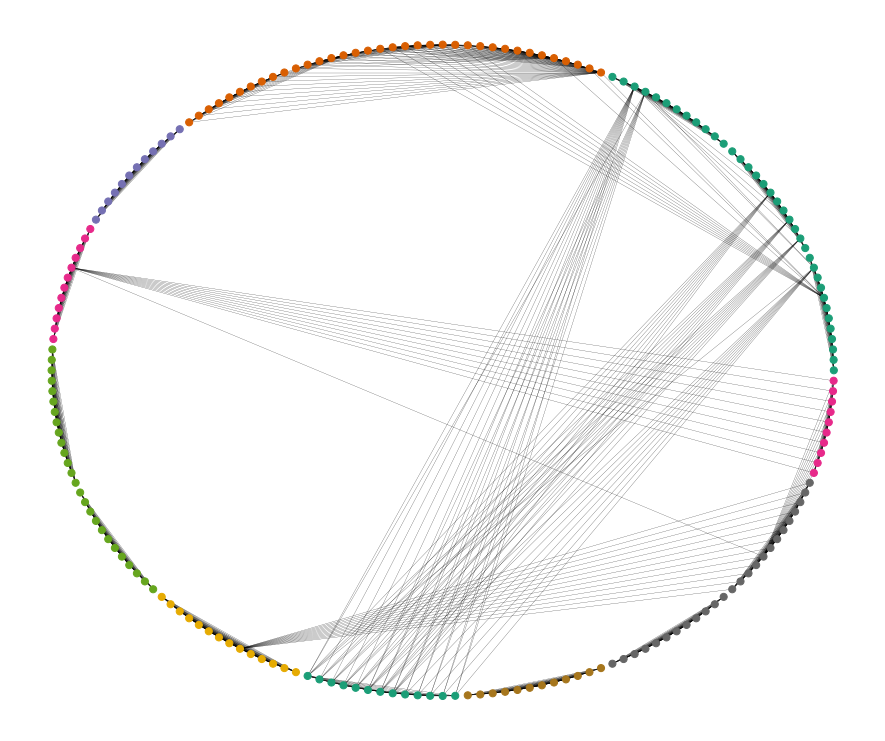

In [27]:
plt.figure(figsize=(12,10))
nx.draw_shell(G, node_size=50, alpha=1, width=0.2, 
              node_color=list(partition.values()), cmap="Dark2")

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

### Generate a network visualization of this graph using the layout of your choice.